# RAG básico passo à passo

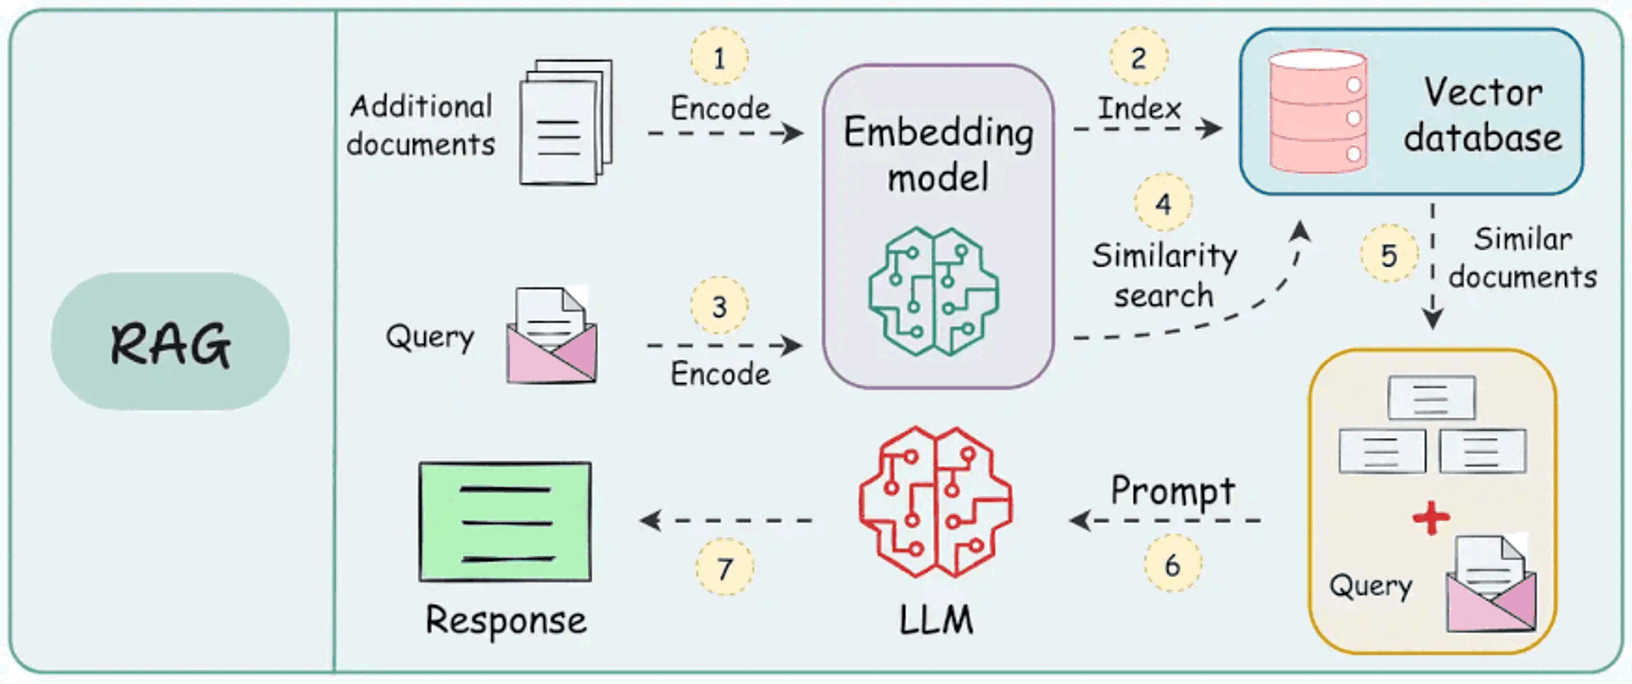

## 0. Instalar dependências

In [ ]:
!pip install -qU langchain-community langchain-openai faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 11.0 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: /opt/homebrew/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip


In [3]:
import os 
import getpass
from dotenv import load_dotenv
load_dotenv()

openai_api_key = os.getenv("OPENAI_API_KEY")
if not openai_api_key:
    openai_api_key = getpass.getpass()

## 1. Baixar documentos e vetorizar com Embeddings

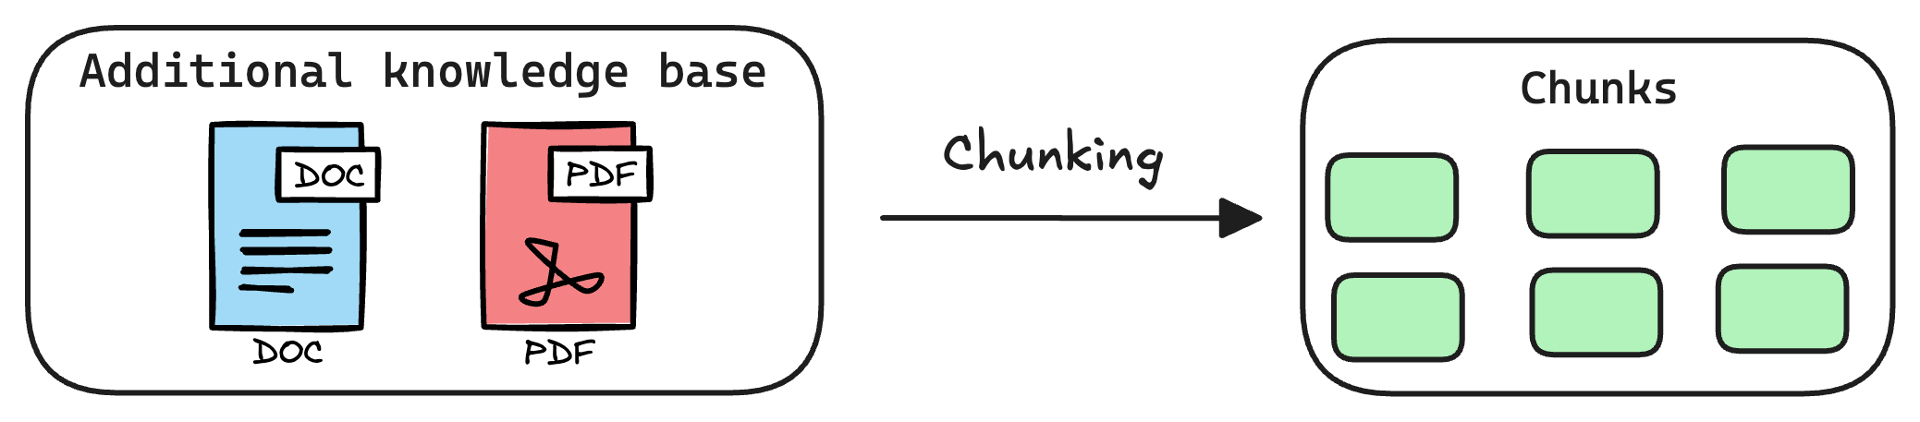

In [4]:
# download das fontes de informação
from langchain_community.document_loaders import TextLoader

documento = TextLoader("documentos/GTB_gold_Nov23.txt", encoding="utf-8").load()


In [5]:
documento

[Document(metadata={'source': 'documentos/GTB_gold_Nov23.txt'}, page_content='\n1\n1 \nVersão: novembro 2023 \n2021 \n \n \n \nPrograma de Cartão da Edição Mastercard Gold  \nGuia de Benefícios \n Informações importantes. Leia e guarde as informações. \n \nEste Guia de Benefícios contém informações detalhadas sobre serviços abrangentes de viagem, seguros \ne assistência aos quais você terá acesso como portador de cartão preferencial. Esses benefícios e serviços \nestão em vigor para portadores do cartão Mastercard Gold elegível a partir de 1 de Novembro de  2023. \nEste Guia substitui qualquer  guia ou comunicação de programa que você recebeu anteriormente. \n \nAs informações contidas neste documento são apresentadas somente com propósito informativo. Não \npretendem  ser  uma  descrição  completa  de  todos  os  termos,  condições,  limitações, exclusões  ou  outras \ndisposições  de  qualquer  programa  ou  benefícios  de  seguro  fornecidos  por,  para,  ou  emitidos  para  a \nMas

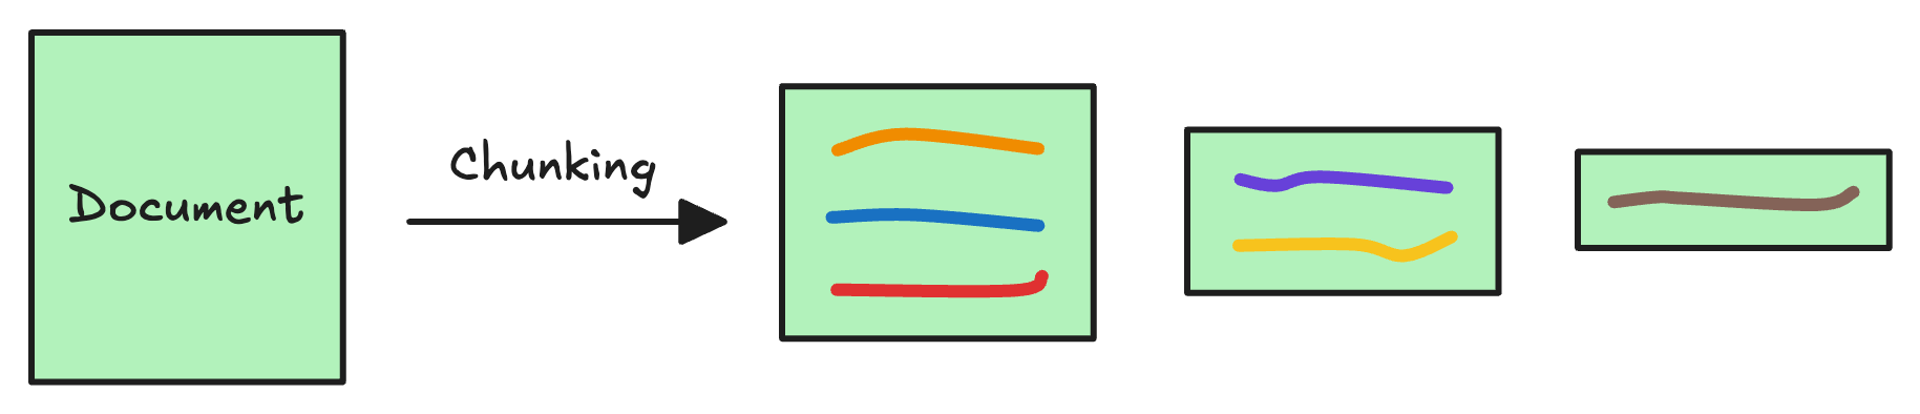

In [6]:
# quebrar os dados em chunks
from langchain.text_splitter import RecursiveCharacterTextSplitter #CharacterTextSplitter

pedacos = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap=100
).split_documents(documento)

In [7]:
len(pedacos)

5

In [8]:
pedacos[:3]

[Document(metadata={'source': 'documentos/GTB_gold_Nov23.txt'}, page_content='1\n1 \nVersão: novembro 2023 \n2021 \n \n \n \nPrograma de Cartão da Edição Mastercard Gold  \nGuia de Benefícios \n Informações importantes. Leia e guarde as informações. \n \nEste Guia de Benefícios contém informações detalhadas sobre serviços abrangentes de viagem, seguros \ne assistência aos quais você terá acesso como portador de cartão preferencial. Esses benefícios e serviços \nestão em vigor para portadores do cartão Mastercard Gold elegível a partir de 1 de Novembro de  2023. \nEste Guia substitui qualquer  guia ou comunicação de programa que você recebeu anteriormente. \n \nAs informações contidas neste documento são apresentadas somente com propósito informativo. Não \npretendem  ser  uma  descrição  completa  de  todos  os  termos,  condições,  limitações, exclusões  ou  outras \ndisposições  de  qualquer  programa  ou  benefícios  de  seguro  fornecidos  por,  para,  ou  emitidos  para  a \nMaste

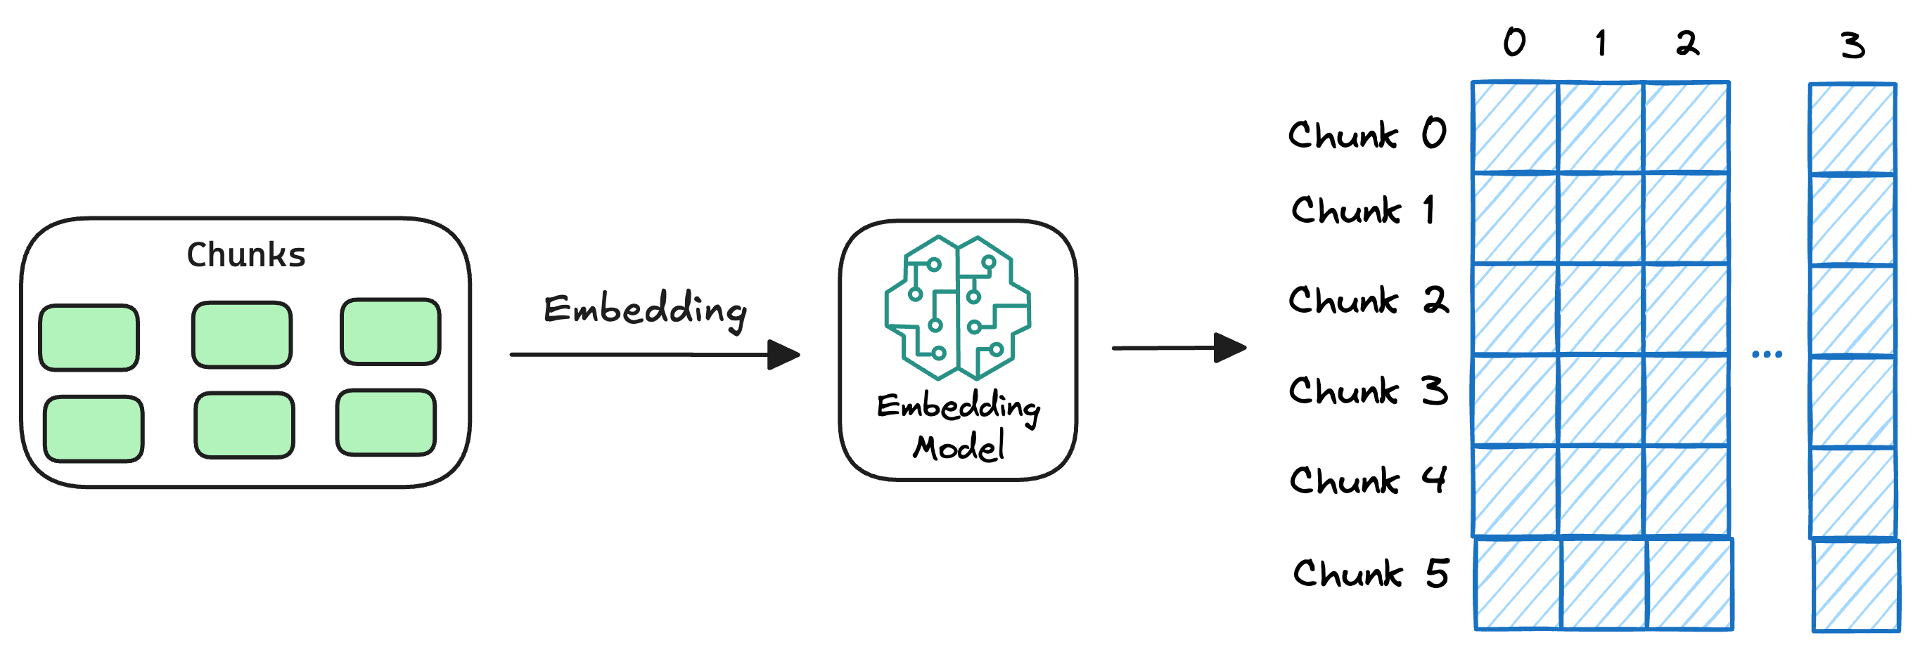

In [9]:
# escolher, baixar do HuggingFace e configurar modelo de Embeddings
from langchain_openai import OpenAIEmbeddings

embeddings_model = OpenAIEmbeddings(api_key=openai_api_key)

In [10]:
pedacos[0].page_content

'1\n1 \nVersão: novembro 2023 \n2021 \n \n \n \nPrograma de Cartão da Edição Mastercard Gold  \nGuia de Benefícios \n Informações importantes. Leia e guarde as informações. \n \nEste Guia de Benefícios contém informações detalhadas sobre serviços abrangentes de viagem, seguros \ne assistência aos quais você terá acesso como portador de cartão preferencial. Esses benefícios e serviços \nestão em vigor para portadores do cartão Mastercard Gold elegível a partir de 1 de Novembro de  2023. \nEste Guia substitui qualquer  guia ou comunicação de programa que você recebeu anteriormente. \n \nAs informações contidas neste documento são apresentadas somente com propósito informativo. Não \npretendem  ser  uma  descrição  completa  de  todos  os  termos,  condições,  limitações, exclusões  ou  outras \ndisposições  de  qualquer  programa  ou  benefícios  de  seguro  fornecidos  por,  para,  ou  emitidos  para  a \nMastercard. \n \nNome  do Representante: MASTERCARD DO BRASIL LTDA.  CNPJ 01.248.2

In [11]:
embeddings_model.embed_query(pedacos[0].page_content)

[-0.02324679307639599,
 -0.01290157064795494,
 -0.008141702972352505,
 -0.02857251837849617,
 -0.007795531302690506,
 0.03520304709672928,
 -0.017148837447166443,
 -0.025816455483436584,
 -0.02640228532254696,
 -0.014765574596822262,
 0.016509750857949257,
 0.005565383471548557,
 -0.03967665880918503,
 -0.03384498879313469,
 -0.012801713310182095,
 0.020930102095007896,
 0.02415216714143753,
 -0.008374704048037529,
 0.006836900487542152,
 0.0071830726228654385,
 0.02974417805671692,
 0.011716596782207489,
 -0.01585734821856022,
 -0.01425963081419468,
 0.014419402927160263,
 -0.004706610459834337,
 -0.009153591468930244,
 -0.0088273910805583,
 0.02560342662036419,
 -0.011696625500917435,
 0.026948172599077225,
 0.013660486787557602,
 -0.011150738224387169,
 -0.0018057539127767086,
 0.016815979033708572,
 -0.018626725301146507,
 -0.0014321209164336324,
 -0.016815979033708572,
 0.0028376132249832153,
 -0.006680457387119532,
 -0.004946267697960138,
 0.014485974796116352,
 0.011743225157260

## 2. Indexar documentos no bando de dados vetorial

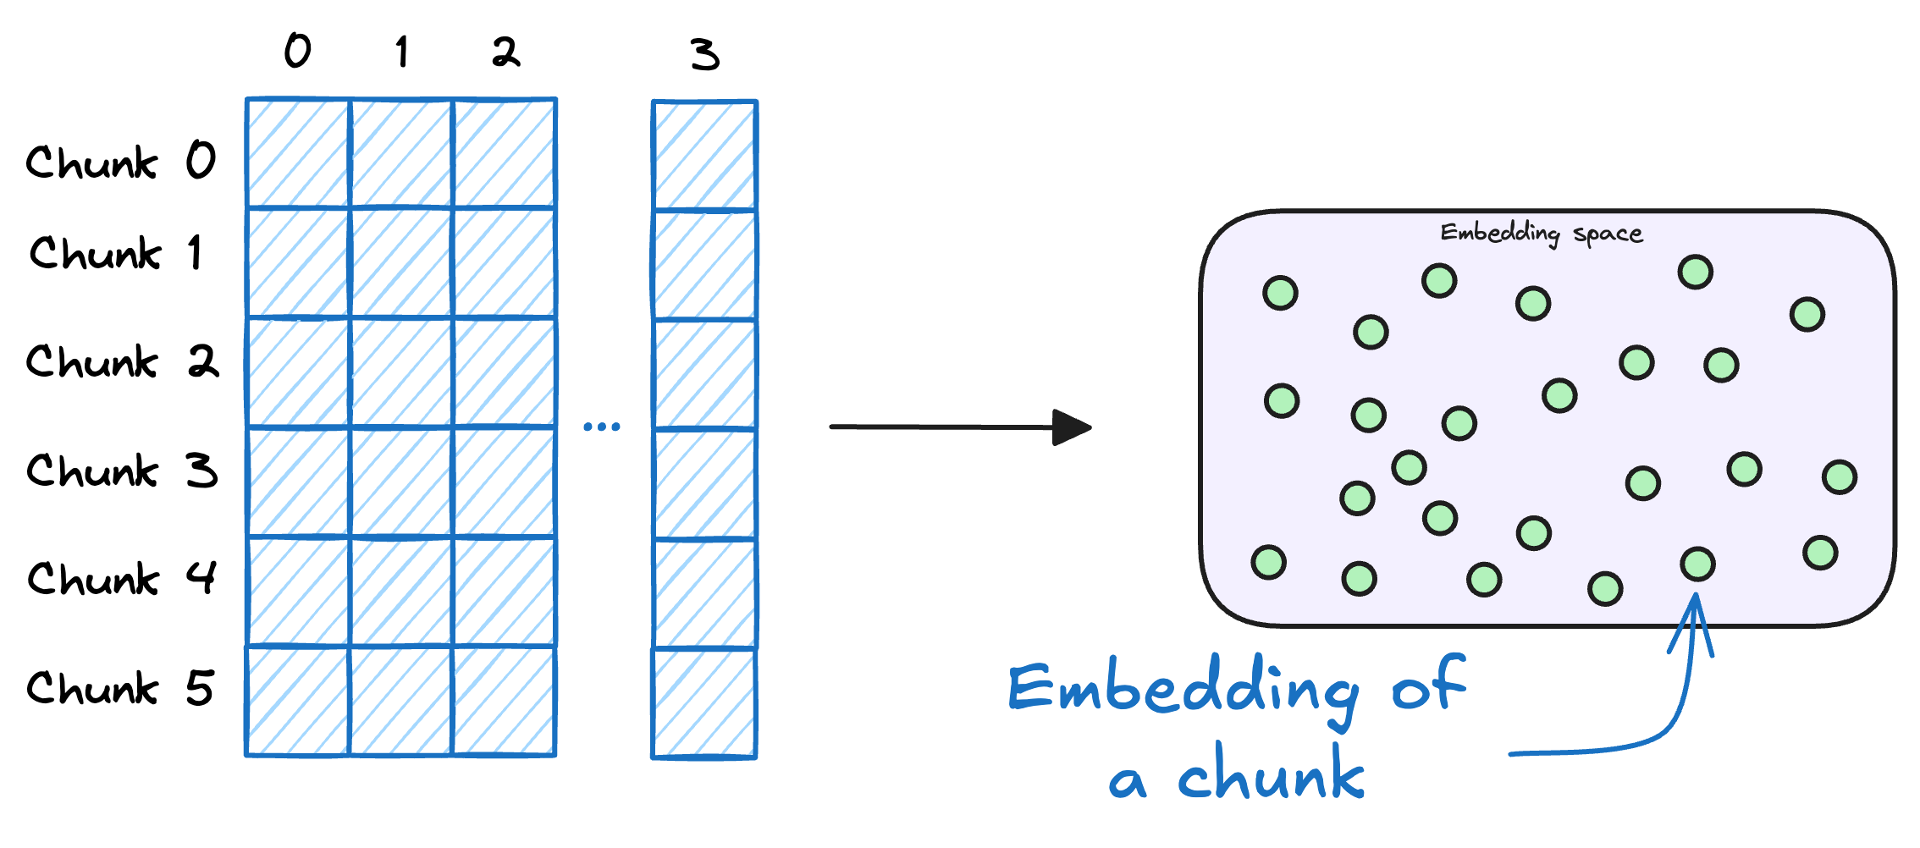

In [ ]:
# Criar banco vetorial na memória
from langchain_community.vectorstores import InMemoryVectorStore

vectorstore = InMemoryVectorStore.from_documents(
    documents=pedacos, embedding=embeddings_model
)

In [13]:
retriever = vectorstore.as_retriever(search_kwargs={"k":2})

In [14]:
# text
retriever.invoke("Seguro viagem")

[Document(id='8586045b-af7c-4d2f-9aa8-8df91d89e8e2', metadata={'source': 'documentos/GTB_gold_Nov23.txt'}, page_content='Seguro Garantia Estendida Original .............................................................................. 3 \nCompra Protegida ........................................................................................................ 8 \nProteção de Preço ....................................................................................................... 12 \nPrincipais Termos e Definições (Em Geral) .................................................................... 17 \nComo Dar Entrada em uma ocorrência/sinistro ........................................................... 18 \nMastercard Global Service .......................................................................................... 21 \nDisposições Gerais e Limitação de Responsabilidade .................................................... 23'),
 Document(id='1cbeb0d8-fa9d-49f9-9f29-dda4ba80dda8'

## 3. Receber consulta do usuário e fazer Embedding

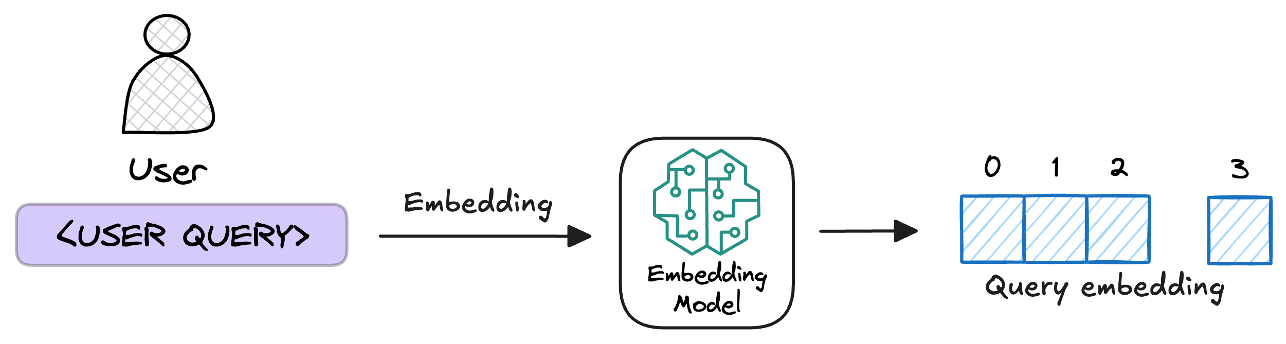

In [35]:
query = "Como devo proceder caso tenha um item comprado roubado?"

query_embed = embeddings_model.embed_documents(query)
query_embed

[[0.0030029260087758303,
  -0.009797807782888412,
  -0.008058317936956882,
  -0.012723313644528389,
  -0.03768894448876381,
  0.0049318489618599415,
  -0.01740807667374611,
  -0.023667603731155396,
  -0.006061858497560024,
  -0.025907855480909348,
  0.009191622026264668,
  0.02767370082437992,
  0.0027327779680490494,
  -0.0072017512284219265,
  -0.026224127039313316,
  0.008822639472782612,
  0.04045631363987923,
  0.011168315075337887,
  0.013652359135448933,
  -0.013145008124411106,
  -0.013994986191391945,
  -0.007004082202911377,
  -0.001617593690752983,
  -0.011491174809634686,
  0.011906280182301998,
  0.026724888011813164,
  0.014350790530443192,
  -0.02951861545443535,
  0.008862173184752464,
  -0.006628510542213917,
  0.019621971994638443,
  -0.002497222041711211,
  -0.022942816838622093,
  -0.00967261753976345,
  0.0022353101521730423,
  -0.013026406057178974,
  -0.011293505318462849,
  -0.022784680128097534,
  0.003759011160582304,
  -0.0019981071818619967,
  0.023245908319

## 4. Buscar Embeddings da consulta no banco vetorial

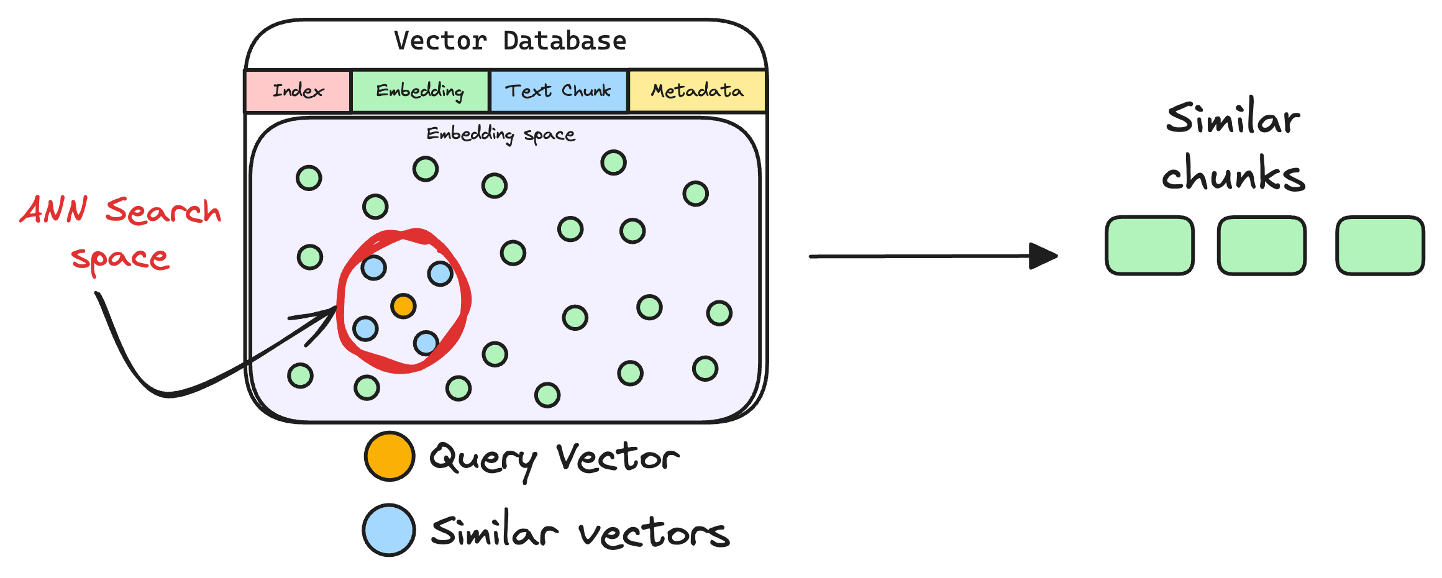

In [36]:
similar_chunks = retriever.invoke(query)
similar_chunks

[Document(id='05cd812d-7c54-4d4a-80b1-714c9ad09f0e', metadata={'source': 'documentos/GTB_gold_Nov23.txt'}, page_content='Seguro Garantia Estendida Original .............................................................................. 3 \nCompra Protegida ........................................................................................................ 8 \nProteção de Preço ....................................................................................................... 12 \nPrincipais Termos e Definições (Em Geral) .................................................................... 17 \nComo Dar Entrada em uma ocorrência/sinistro ........................................................... 18 \nMastercard Global Service .......................................................................................... 21 \nDisposições Gerais e Limitação de Responsabilidade .................................................... 23'),
 Document(id='769458b2-ddc4-478b-a8b2-4ccbd4298af1'

## 5. Resgatar os documentos similares do banco

In [37]:
similar_texts = [ chunk.page_content for chunk in similar_chunks ]
similar_texts

['Seguro Garantia Estendida Original .............................................................................. 3 \nCompra Protegida ........................................................................................................ 8 \nProteção de Preço ....................................................................................................... 12 \nPrincipais Termos e Definições (Em Geral) .................................................................... 17 \nComo Dar Entrada em uma ocorrência/sinistro ........................................................... 18 \nMastercard Global Service .......................................................................................... 21 \nDisposições Gerais e Limitação de Responsabilidade .................................................... 23',
 'uma perda ou pedido de serviços forem efetuados, se você intencionalmente ocultar ou fizer \ninterpretação  errônea  de  qualquer  fato  material  ou  circunstância,  ou

In [38]:
sources = list(set([ chunk.metadata['source'] for chunk in similar_chunks ]))
sources

['documentos/GTB_gold_Nov23.txt']

## 6. Aumentar o prompt com consulta e documentos

In [48]:
from langchain_core.prompts import ChatPromptTemplate

prompt_consulta_seguro = ChatPromptTemplate.from_messages(
    [
        ("system", "Responda usando exclusivamente o conteúdo fornecido. \n\nContexto: \n{contexto}"),
        ("human", "{query}")
    ]
)

## 7. Gerar a Resposta

In [57]:
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser

modelo = ChatOpenAI(
    model="gpt-4.1-nano",
    temperature=0.5,
    api_key=openai_api_key
)

def no_rag(pergunta):
  return modelo.invoke(pergunta)

def rag(pergunta):
  cadeia = prompt_consulta_seguro | modelo | StrOutputParser()
  # retrieve
  trechos = retriever.invoke(query)
  # augment
  contexto = "\n\n".join(um_trecho.page_content for um_trecho in trechos)
  # generate
  return cadeia.invoke({ "query": pergunta, "contexto": contexto})

In [50]:
query

'Como devo proceder caso tenha um item comprado roubado?'

In [52]:
no_rag(query).content

'Se você teve um item comprado roubado, é importante agir rapidamente e seguir alguns passos para tentar resolver a situação. Veja o que fazer:\n\n1. **Registre um Boletim de Ocorrência:** Vá até uma delegacia de polícia ou registre o boletim online (se disponível na sua região). Informe detalhes do roubo, como data, hora, local, descrição do item e quaisquer testemunhas ou evidências que possam ajudar na investigação.\n\n2. **Informe a loja ou o vendedor:** Entre em contato com o estabelecimento onde adquiriu o item. Se a compra foi feita por um site ou plataforma de vendas, notifique o suporte ao cliente e informe o ocorrido. Em alguns casos, eles podem ajudar na investigação ou emitir uma segunda via de nota fiscal.\n\n3. **Verifique a possibilidade de seguro:** Se o item comprado estava segurado (por exemplo, por um seguro residencial ou de bens pessoais), entre em contato com a seguradora para verificar se você tem direito a indenização.\n\n4. **Procure orientações jurídicas:** De

In [58]:
rag(query)

'Para dar entrada em uma ocorrência ou sinistro relacionado a um item roubado, você deve ligar para o número gratuito do Mastercard Global Service™ específico para o seu país, ou ligar a cobrar para os Estados Unidos no número 1-636-722-8881 (Português).'

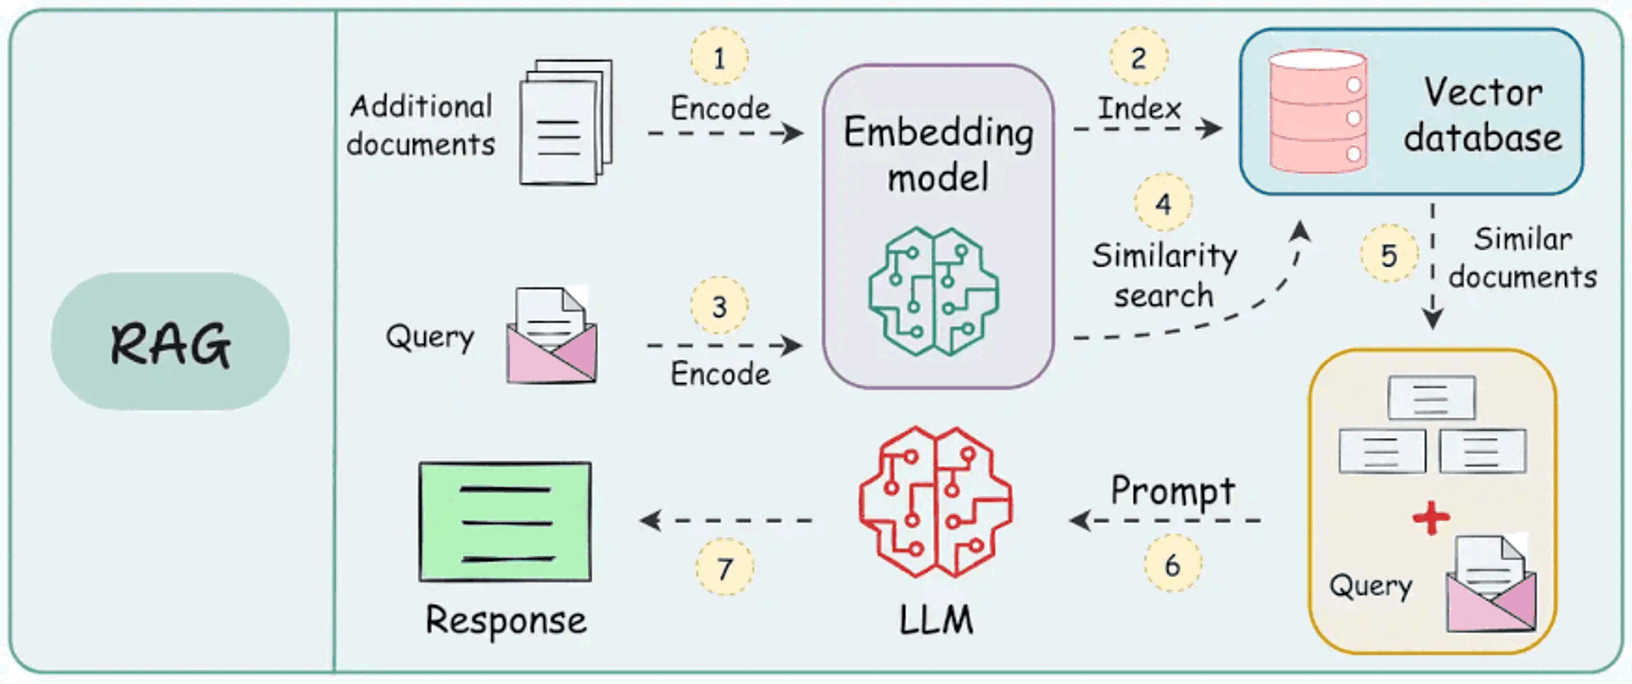

In [61]:
from langchain.globals import set_debug

set_debug(True)
rag(query)

[chain/start] [chain:RunnableSequence] Entering Chain run with input:
{
  "query": "Como devo proceder caso tenha um item comprado roubado?",
  "contexto": "Seguro Garantia Estendida Original .............................................................................. 3 \nCompra Protegida ........................................................................................................ 8 \nProteção de Preço ....................................................................................................... 12 \nPrincipais Termos e Definições (Em Geral) .................................................................... 17 \nComo Dar Entrada em uma ocorrência/sinistro ........................................................... 18 \nMastercard Global Service .......................................................................................... 21 \nDisposições Gerais e Limitação de Responsabilidade .................................................... 23\n\numa perda ou pe

'Para dar entrada em uma ocorrência ou sinistro referente a um item comprado roubado, você deve ligar para o número gratuito do Mastercard Global Service™ específico para o seu país ou, se estiver nos Estados Unidos, ligar a cobrar para o número 1-636-722-8881 (Português).'

In [ ]:
import getpass
import os

os.environ["LANGSMITH_TRACING"] = "true"
os.environ["LANGSMITH_API_KEY"] = "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"#getpass.getpass()

560cf1f0-6ba7-4510-9063-64e3191e1fc8
set_debug(False)
from langsmith import traceable

@traceable
def rag_trace(pergunta):
  cadeia = prompt_consulta_seguro | modelo | StrOutputParser()
  # retrieve
  trechos = retriever.invoke(query)
  # augment
  contexto = "\n\n".join(um_trecho.page_content for um_trecho in trechos)
  # generate
  return cadeia.invoke({ "query": pergunta, "contexto": contexto})

rag_trace(query)

'Para dar entrada em uma ocorrência ou sinistro referente a um item comprado roubado, você deve ligar para o número gratuito do Mastercard Global Service™ específico para o seu país ou ligar a cobrar para os Estados Unidos no número 1-636-722-8881 (Português).'